In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from bmcs_cross_section.api import AnaFRPBending

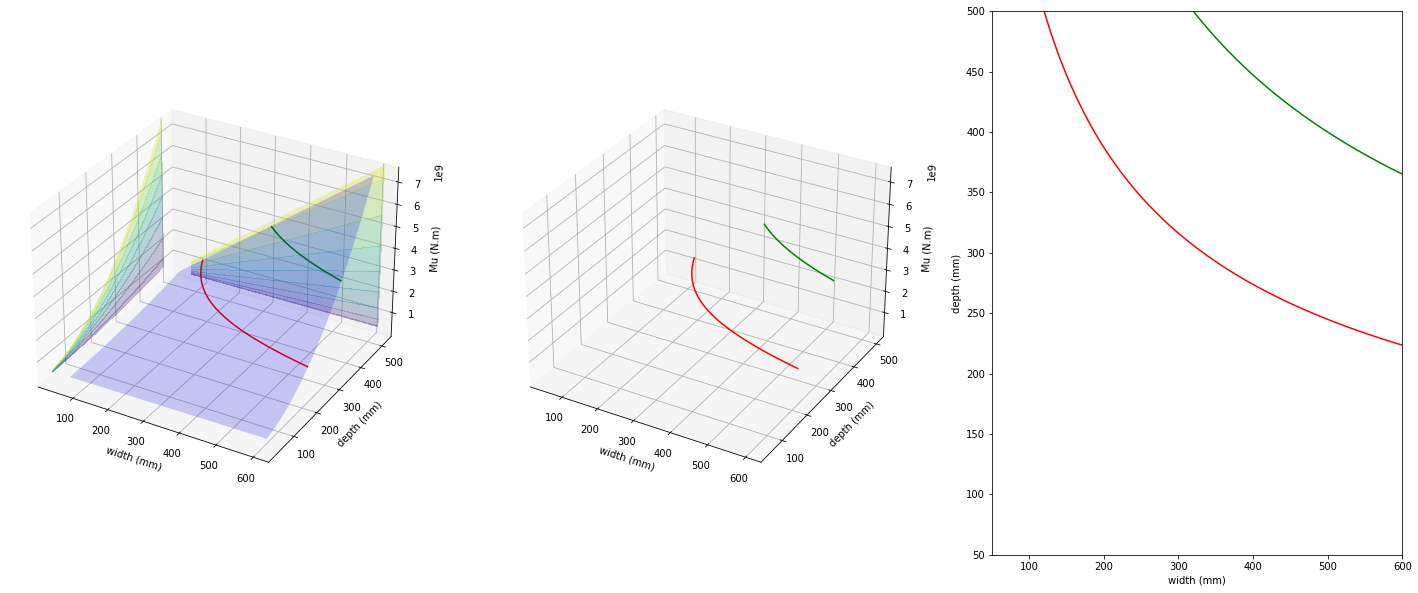

In [13]:
def g(b, d):
    # b, d in mm
    f_cm = 50 #MPa
    Mu = f_cm*(b)*(d)**2
    return Mu 


b_range = np.linspace(50, 600, 100)  # Width (mm)
d_range = np.linspace(50, 500, 100)  # Depth (mm)
p_range = np.linspace(0.1, 2, 1)  # Depth (mm)

x, y = np.meshgrid(b_range, d_range)

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133)
ax1.set_xlabel('width (mm)')
ax1.set_ylabel('depth (mm)')
ax1.set_zlabel('Mu (N.m)')
ax2.set_xlabel('width (mm)')
ax2.set_ylabel('depth (mm)')
ax2.set_zlabel('Mu (N.m)')
ax3.set_xlabel('width (mm)')
ax3.set_ylabel('depth (mm)')

target_Mu = [1.5e+9, 4e+9]
colors = ['r', 'g', 'm', 'k']

z = np.array([[g(b, d) for b in b_range] for d in d_range])
ax1.plot_surface(x, y, z, color='b', alpha=0.2)
cmap = plt.cm.get_cmap('viridis')
ax1.contourf(x, y, z, zdir='x', offset=0, cmap=cmap , alpha=0.3)
ax1.contourf(x, y, z, zdir='y', offset=550, cmap=cmap, alpha=0.3)
for index, target_z_value in enumerate(target_Mu):
    ax1.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
    ax2.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
    contour=ax3.contour(x, y, z, levels=[target_z_value], colors=colors[index])
    
    

    
    
        
plt.show()
